## Data engineering
#### Dataset: SelfRegulationSCP1
#### Author: Edgar Acuna 
#### Created: March 20,2025

In [92]:
# cnn lstm model
import numpy as np
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
 

In [93]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing

def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y= load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### The training dataset

In [95]:
# loading Training data
X, y = load_data("SelfRegulationSCP1",split="Train")

 Shape of X =  (268, 6, 896)
 Shape of y =  (268,)
 New shape of X =  (268, 896, 6)
 New shape of y =  (268, 2)


In [96]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [97]:
#class size in training 
import numpy as np
np.sum(y,axis=0)

array([135, 133])

In [98]:
X1=X[yo==0]
X2=X[yo==1]

In [99]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
print(Xa2.shape)

(6, 896)


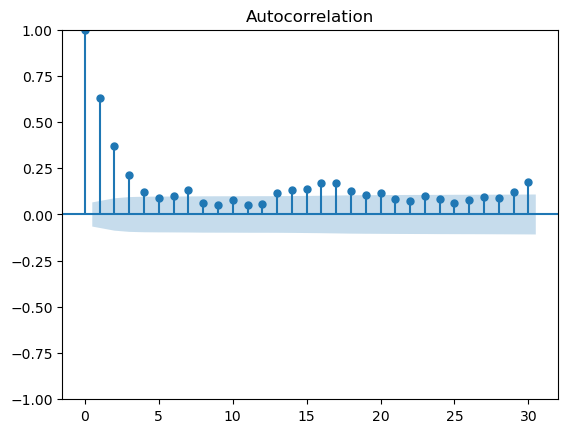

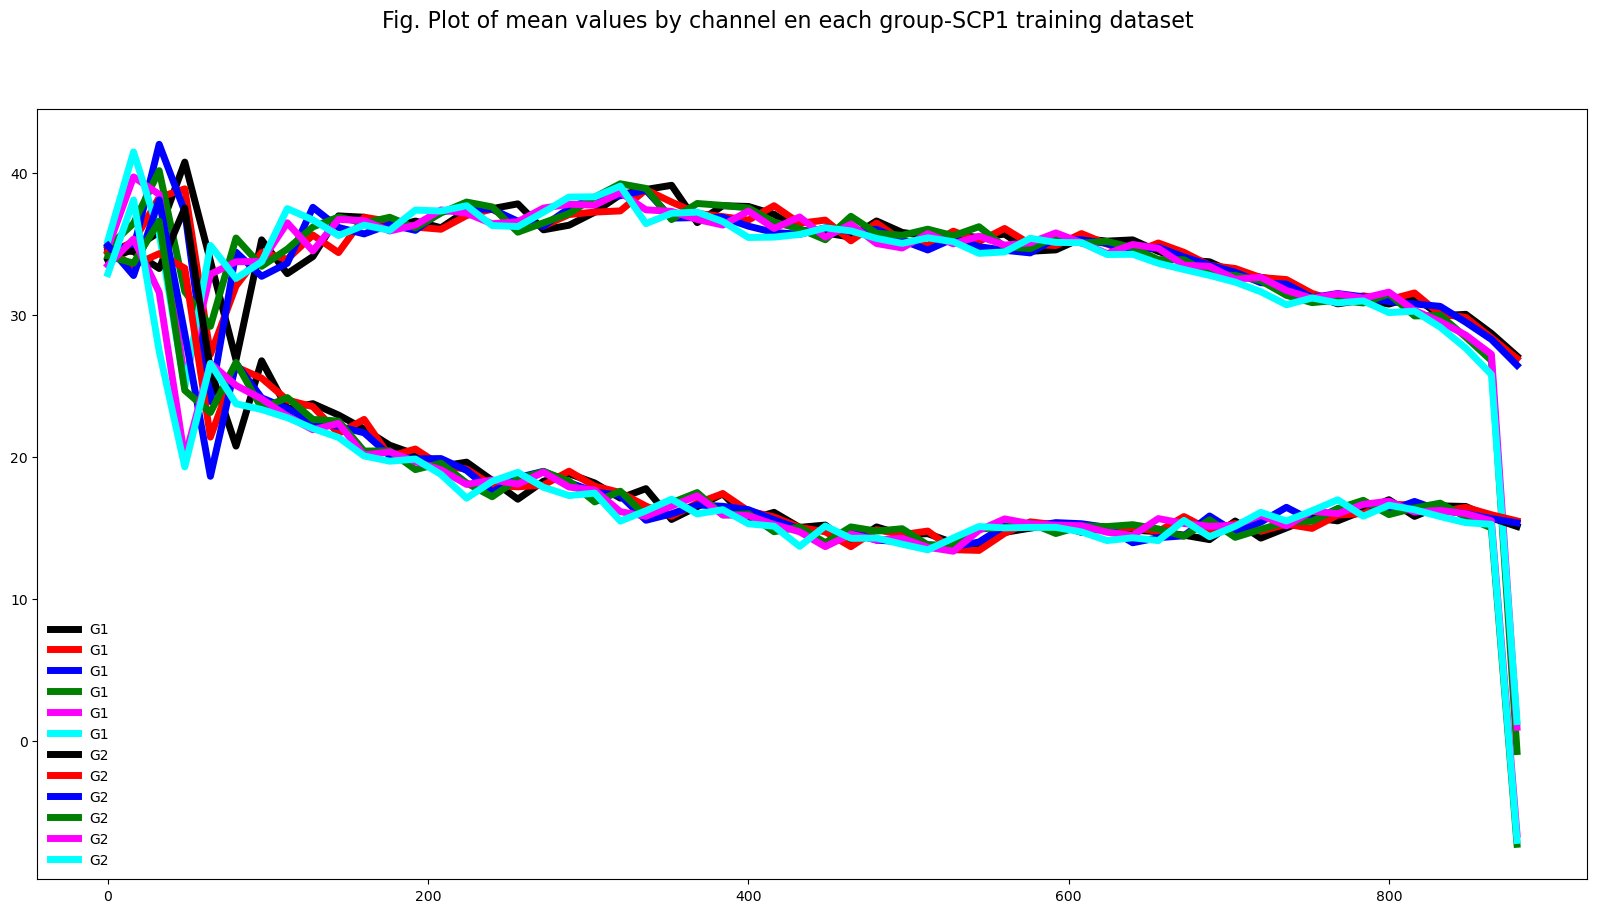

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,896,16)
fig.suptitle("Fig. Plot of mean values by channel en each group-SCP1 training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5,  label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='red', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='blue', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[3,ejex], color='green',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[4,ejex], color='magenta', lw=5, label='G1')
ax.plot(ejex, Xa1.iloc[5,ejex], color='cyan', lw=5,  label='G1')
ax.plot(ejex, Xa2.iloc[0,ejex], color='black',lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa2.iloc[3,ejex], color='green',lw=5,  label='G2')
ax.plot(ejex,Xa2.iloc[4,ejex], color='magenta', lw=5, label='G2')
ax.plot(ejex, Xa2.iloc[5,ejex], color='cyan', lw=5, label='G2')
ax.legend(loc='best', frameon=False)
plt.show()

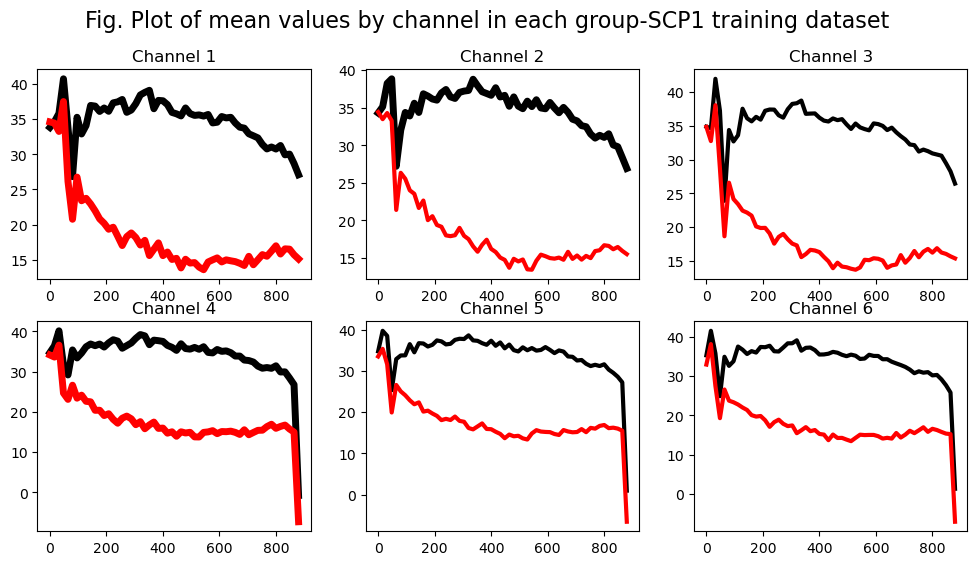

In [101]:
fig, axs = plt.subplots(2, 3,figsize=(12,6))
ejex=range(0,896,16)
fig.suptitle("Fig. Plot of mean values by channel in each group-SCP1 training dataset",fontsize=16)
axs[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5,  label='G1')
axs[0,0].plot(ejex, Xa2.iloc[0,ejex], color='red',lw=5, label='G2')
axs[0,0].set_title("Channel 1")
axs[0,1].plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5, label='G1')
axs[0,1].plot(ejex, Xa2.iloc[1,ejex], color='red', lw=3, label='G1')
axs[0,1].set_title("Channel 2")
axs[0,2].plot(ejex, Xa1.iloc[2,ejex], color='black',lw=3, label='G1')
axs[0,2].plot(ejex,Xa2.iloc[2,ejex], color='red', lw=3, label='G1')
axs[0,2].set_title("Channel 3")
axs[1,0].plot(ejex, Xa1.iloc[3,ejex], color='black', lw=5,  label='G1')
axs[1,0].plot(ejex, Xa2.iloc[3,ejex], color='red',lw=5, label='G2')
axs[1,0].set_title("Channel 4")
axs[1,1].plot(ejex,Xa1.iloc[4,ejex], color='black', lw=3, label='G2')
axs[1,1].plot(ejex, Xa2.iloc[4,ejex], color='red', lw=3, label='G2')
axs[1,1].set_title("Channel 5")
axs[1,2].plot(ejex, Xa1.iloc[5,ejex], color='black',lw=3,  label='G2')
axs[1,2].plot(ejex,Xa2.iloc[5,ejex], color='red', lw=3, label='G2')
axs[1,2].set_title("Channel 6")
#ax.legend(loc='best', frameon=False)
plt.show()

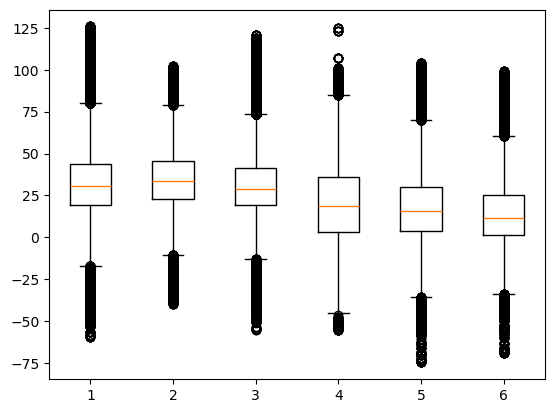

In [102]:
#Boxplots of the features in the training set 
np.sum(y,axis=0)
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)
pyplot.boxplot(tempotr)
pyplot.show()

### Testing dataset

In [104]:
# loading Testing data
Xt, yt = load_data("SelfRegulationSCP1",split="Test")

 Shape of X =  (293, 6, 896)
 Shape of y =  (293,)
 New shape of X =  (293, 896, 6)
 New shape of y =  (293, 2)


In [105]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([147, 146])

In [106]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.5017064846416383

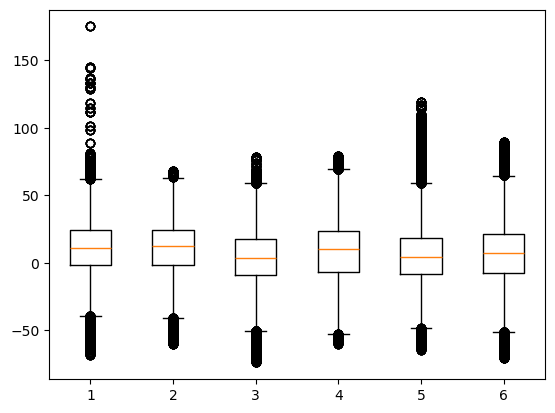

In [107]:
#Boxplots of the features in the testing set 
tempote=Xt.reshape(Xt.shape[2],-1).T
tempote=pd.DataFrame(tempote)
pyplot.boxplot(tempote)
pyplot.show()

In [108]:
tempotr.describe()

,0,1,2,3,4,5
count,240128.000000,240128.000000,240128.000000,240128.000000,240128.000000,240128.000000
mean,34.605349,34.803025,33.279439,20.291662,17.526547,14.986696
std,23.884355,17.971586,22.104640,24.312380,21.316980,20.817783
min,-59.340000,-39.530000,-55.500000,-55.220000,-74.690000,-69.310000
25%,19.530000,22.970000,19.500000,3.280000,3.810000,1.500000
50%,30.560000,33.660000,28.620000,18.530000,15.660000,11.690000
75%,43.810000,45.440000,41.120000,35.970000,30.280000,25.190000
max,125.840000,102.310000,120.620000,124.940000,104.310000,99.440000


In [109]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>],
       [<Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>]], dtype=object)

In [110]:
#temptr.groupby('group').mean()

In [111]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.29540706])

In [112]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(1608, 896)


### Distance between groups

In [114]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([0.29540706])

In [115]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(896,)

In [116]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

In [117]:
a.shape

(2, 896)

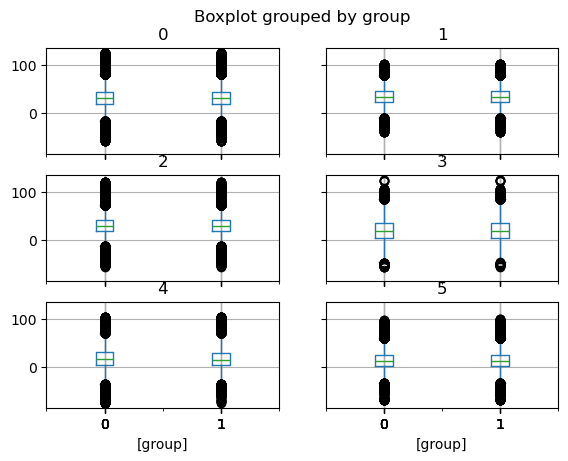

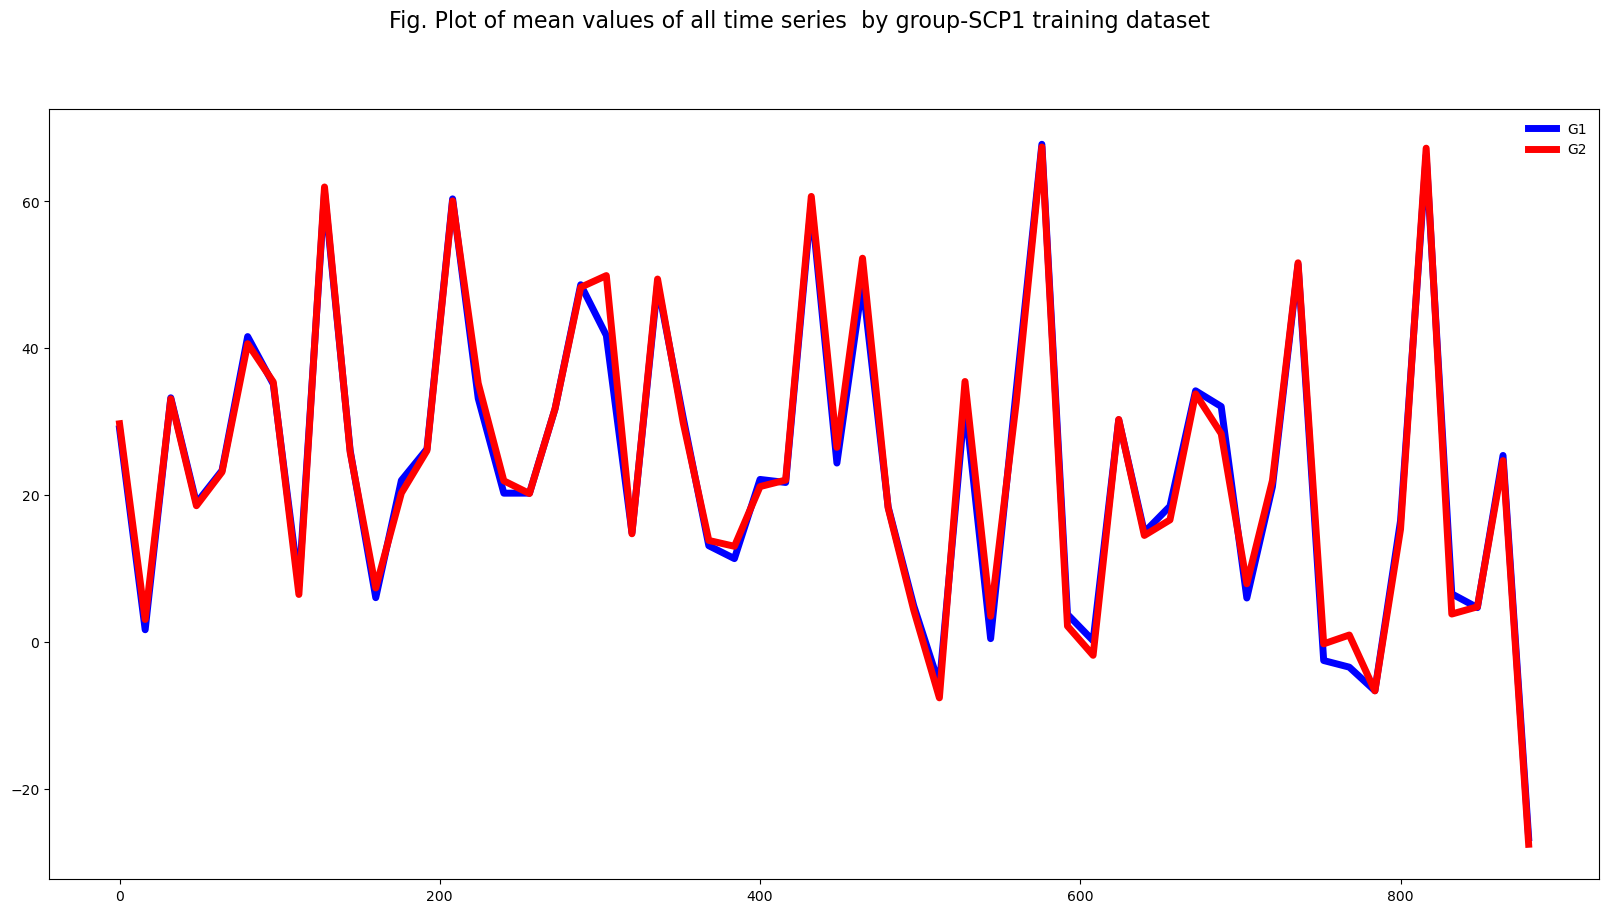

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,896,16)
fig.suptitle("Fig. Plot of mean values of all time series  by group-SCP1 training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='blue',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.legend(loc='best', frameon=False)
plt.show()

### Feature Selection

In [120]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:896]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/896

1.7857142857142858

In [121]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-valu1-.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/896

68.41517857142857

### Testing data

In [123]:
import numpy as np
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)

In [124]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(1758, 896)


In [125]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

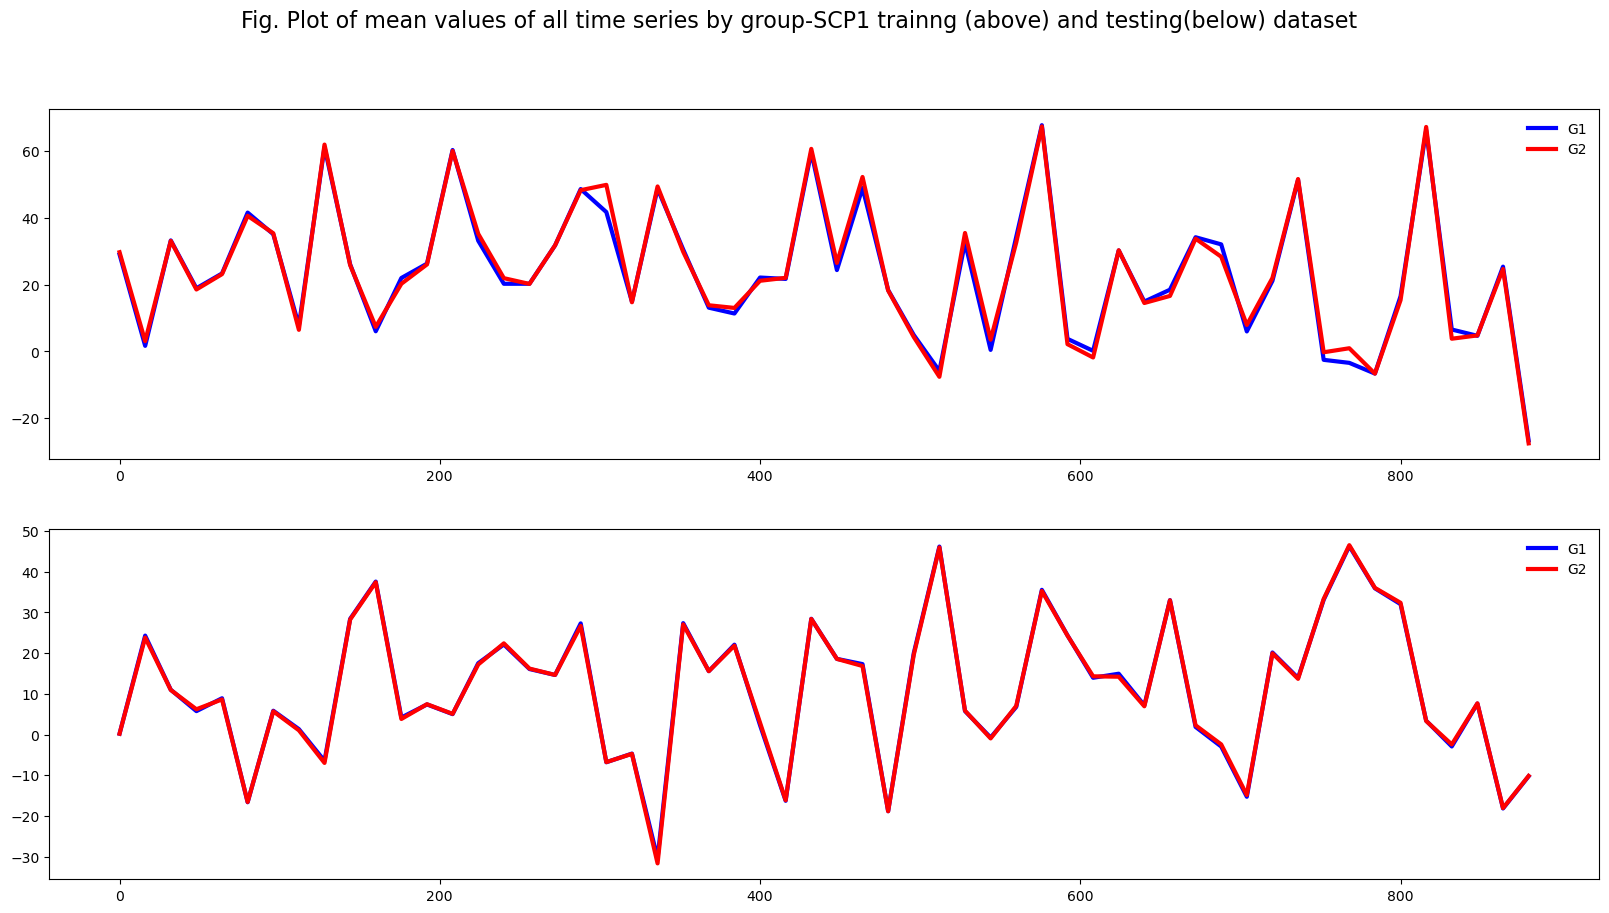

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
ejex=np.arange(0,896,16)
fig.suptitle("Fig. Plot of mean values of all time series by group-SCP1 trainng (above) and testing(below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='blue',lw=3, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=3, label='G2')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='blue',lw=3, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=3, label='G2')
ax2.legend(loc='best', frameon=False)
plt.show()

In [127]:
Xt1=Xt[yto==0]
Xt2=Xt[yto==1]

In [128]:
Xta1=Xt1.mean(axis=0).T
Xta1=pd.DataFrame(Xta1)
Xta2=Xt2.mean(axis=0).T
Xta2=pd.DataFrame(Xta2)
print(Xa2.shape)

(6, 896)


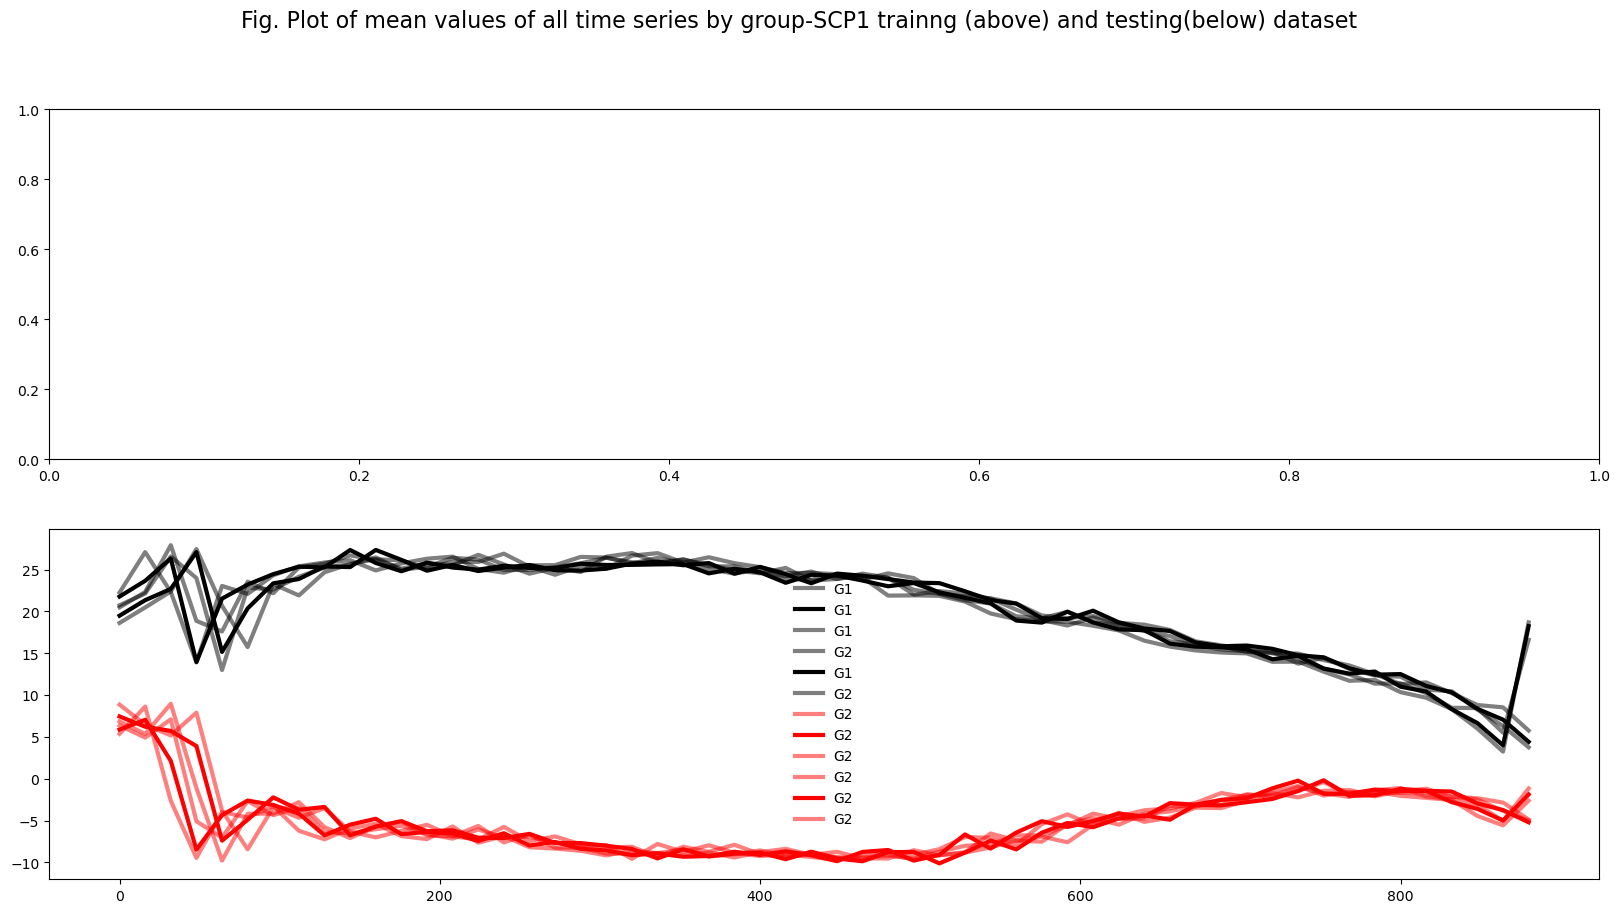

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
ejex=np.arange(0,51,1)
fig.suptitle("Fig. Plot of mean values of all time series by group-SCP1 trainng (above) and testing(below) dataset",fontsize=16)
ejex=range(0,896,16)
ax2.plot(ejex, Xta1.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax2.plot(ejex,Xta1.iloc[1,ejex], color='black', lw=3, label='G1')
ax2.plot(ejex, Xta1.iloc[2,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax2.plot(ejex, Xta1.iloc[3,ejex], color='black',lw=3, alpha=0.5, label='G2')
ax2.plot(ejex,Xta1.iloc[4,ejex], color='black', lw=3, label='G1')
ax2.plot(ejex, Xta1.iloc[5,ejex], color='black', lw=3, alpha=0.5, label='G2')
ax2.plot(ejex, Xta2.iloc[0,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax2.plot(ejex,Xta2.iloc[1,ejex], color='red', lw=3, label='G2')
ax2.plot(ejex, Xta2.iloc[2,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax2.plot(ejex, Xta2.iloc[3,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax2.plot(ejex,Xta2.iloc[4,ejex], color='red', lw=3, label='G2')
ax2.plot(ejex, Xta2.iloc[5,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax2.legend(loc='best', frameon=False)
plt.show()

In [130]:
#Boxplots of each feature inthe groups pf the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Bboxplot  of features by class
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>,
        <Axes: title={'center': '3'}, xlabel='[group]'>],
       [<Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>]], dtype=object)

In [131]:
tempote.describe()

,0,1,2,3,4,5
count,262528.000000,262528.000000,262528.000000,262528.000000,262528.000000,262528.000000
mean,10.553165,10.894609,3.409217,8.931123,5.653746,6.667898
std,20.875197,19.625930,20.651854,22.088034,22.016109,21.157371
min,-68.190000,-60.440000,-73.840000,-59.940000,-64.280000,-70.500000
25%,-1.440000,-1.910000,-9.380000,-6.970000,-8.340000,-7.780000
50%,10.810000,12.340000,3.620000,10.000000,4.190000,7.160000
75%,24.090000,24.190000,17.970000,23.560000,18.500000,21.190000
max,175.060000,68.310000,78.340000,79.220000,119.310000,89.620000


In [132]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(561, 896, 6)


(502656, 6)


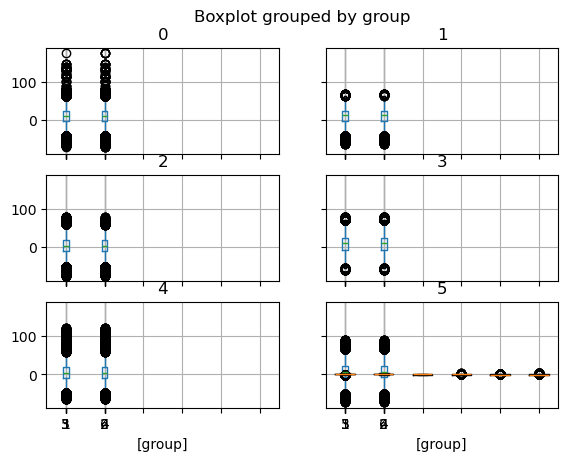

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
X1 = Xb.reshape(Xb.shape[2],-1).T
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [134]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(896,)

In [135]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

1022.6890823038771

### Stationarity

In [137]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[150,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.899557
p-value: 0.000035
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


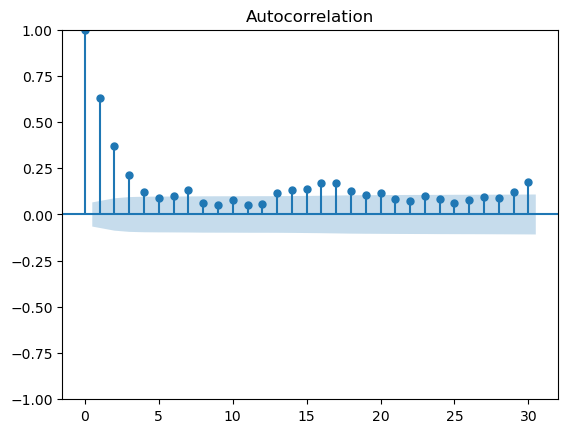

In [138]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)